<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>


<br>
  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
<br>

This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>See <a href="https://github.com/ultralytics/yolov5/issues/new/choose">GitHub</a> for community support or <a href="https://ultralytics.com/contact">contact us</a> for professional support.

</div>

Mounting Google Drive

In [ ]:
from google.colab import drive                                     
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks        

YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [ ]:
!unzip -q ../gdrive/MyDrive/Dataset/data_xyz.zip -d ../

# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
 #display.Image(filename='runs/detect/exp/test.jpg', width=600)

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-133-gcca5e21 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/3 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 12.4ms
image 2/3 /content/yolov5/data/images/test.jpg: 384x640 (no detections), 13.5ms
image 3/3 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 9.0ms
Speed: 0.4ms pre-process, 11.6ms inference, 0.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


#Display Detection

In [ ]:
 ###________DISPLAY___________
 from PIL import Image

 img = Image.open('/content/yolov5/runs/detect/exp2/test.jpg')
 img.show()

FileNotFoundError: ignored

# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

In [ ]:
# Download COCO val (Unneccessary for now)

#### torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
##### !unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

  0%|          | 0.00/780M [00:00<?, ?B/s]

In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-119-g5543b89 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning /content/datasets/coco/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100% 5000/5000 [00:03<00:00, 1470.21it/s]
val: New cache created: /content/datasets/coco/val2017.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 157/157 [01:16<00:00,  2.05it/s]
                   all       5000      36335      0.671      0.519      0.566      0.371
Speed: 0.1ms pre-process, 2.8ms inference, 2.0ms NMS per image at shape (32

# 3. Train

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/im/integrations-loop.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br><br>

A **Mosaic Dataloader** is used for training which combines 4 images into 1 mosaic.

## Train on Custom Data with Roboflow 🌟 NEW

[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily **organize, label, and prepare** a high quality dataset with your own custom data. Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building workflow with the `roboflow` pip package.

- Custom Training Example: [https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/](https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/?ref=ultralytics)
- Custom Training Notebook: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/yolov5-custom-training-tutorial/blob/main/yolov5-custom-training.ipynb)
<br>

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="480" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/6152a275ad4b4ac20cd2e21a_roboflow-annotate.gif"/></a></p>Label images lightning fast (including with model-assisted labeling)

In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'ClearML' #@param ['ClearML', 'Comet', 'TensorBoard']

if logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.2 MB/s eta 0:00:00


<IPython.core.display.Javascript object>


🤖 ClearML connected successfully - let's build something! 🚀


In [ ]:
# Got this line from Stack Overflow. It uses to delete labels of data (some sort of, not necessary now)

# !rm -f data/train/labels.npy

# Checking the size of images and displaying them

In [ ]:
import numpy as np
import cv2
# Image shape in Training
image = cv2.imread('/content/train/images/00000_jpg.rf.52f5695f911eb075211feb0a93d03838.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the training image {}, {}".format(height, width))
# Image shape in validation
image = cv2.imread('/content/valid/images/00008_jpg.rf.58223c95a24321bf9464e7317adfb32d.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the validation image {}, {}".format(height, width))

shape of the training image 800, 1360
shape of the validation image 800, 1360


#Displaying Picture

In [ ]:
from PIL import Image
# Image(filename='/content/train/images/00000_jpg.rf.52f5695f911eb075211feb0a93d03838.jpg', width=800)

img = Image.open('/content/train/images/00000_jpg.rf.52f5695f911eb075211feb0a93d03838.jpg')
img.show()

FileNotFoundError: ignored

# Training Code

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 24 --epochs 20 --data data/custom_data.yaml --weights yolov5s.pt --cache 

train: weights=yolov5s.pt, cfg=, data=data/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=24, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, 

# Evaluate Custom YOLOv5 Detector Performance

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs/train/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-04-02 20:37:09.897170: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 20:37:10.693505: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-02 20:37:12.187971: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-02 20:37:12.227313: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative 

  local logging

In [ ]:
#Extra
print("\n")
img = Image.open('/content/yolov5/runs/train/exp6/val_batch1_labels.jpg')
img.show()
print("\n")
print("This shows a graph comparison:\n")
img2 = Image.open('/content/yolov5/runs/train/exp6/results.png')
img2.show()

# Below code shows Graph of parameters
#####.........Image(filename='/content/yolov5/runs/train/exp3/results.png', width=800)


Load TensorBoard

In [ ]:
#load tensorboard

%load_ext tensorboard
%tensorboard --logdir '/content/gdrive/MyDrive/customTF2/training'

Viewing Test Images

In [ ]:
import cv2
image = cv2.imread('/content/data_xyz/test/images/00082_jpg.rf.fbaa096d7bcdd6ff360d8f7d661c0dd1.jpg')

Inferance on Image

In [ ]:
!python detect.py  --source /content/data_xyz/test/images/00082_jpg.rf.fbaa096d7bcdd6ff360d8f7d661c0dd1.jpg --weights /content/yolov5/runs/train/exp/weights/best.pt --conf 0.1

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/data_xyz/test/images/00082_jpg.rf.fbaa096d7bcdd6ff360d8f7d661c0dd1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7142278 parameters, 0 gradients, 16.2 GFLOPs
image 1/1 /content/data_xyz/test/images/00082_jpg.rf.fbaa096d7bcdd6ff360d8f7d661c0dd1.jpg: 384x640 2 Prohibition for all types of vehicles, 65.2ms
Speed: 0.6ms pre-process, 65.2ms inference, 83.3ms NMS per 

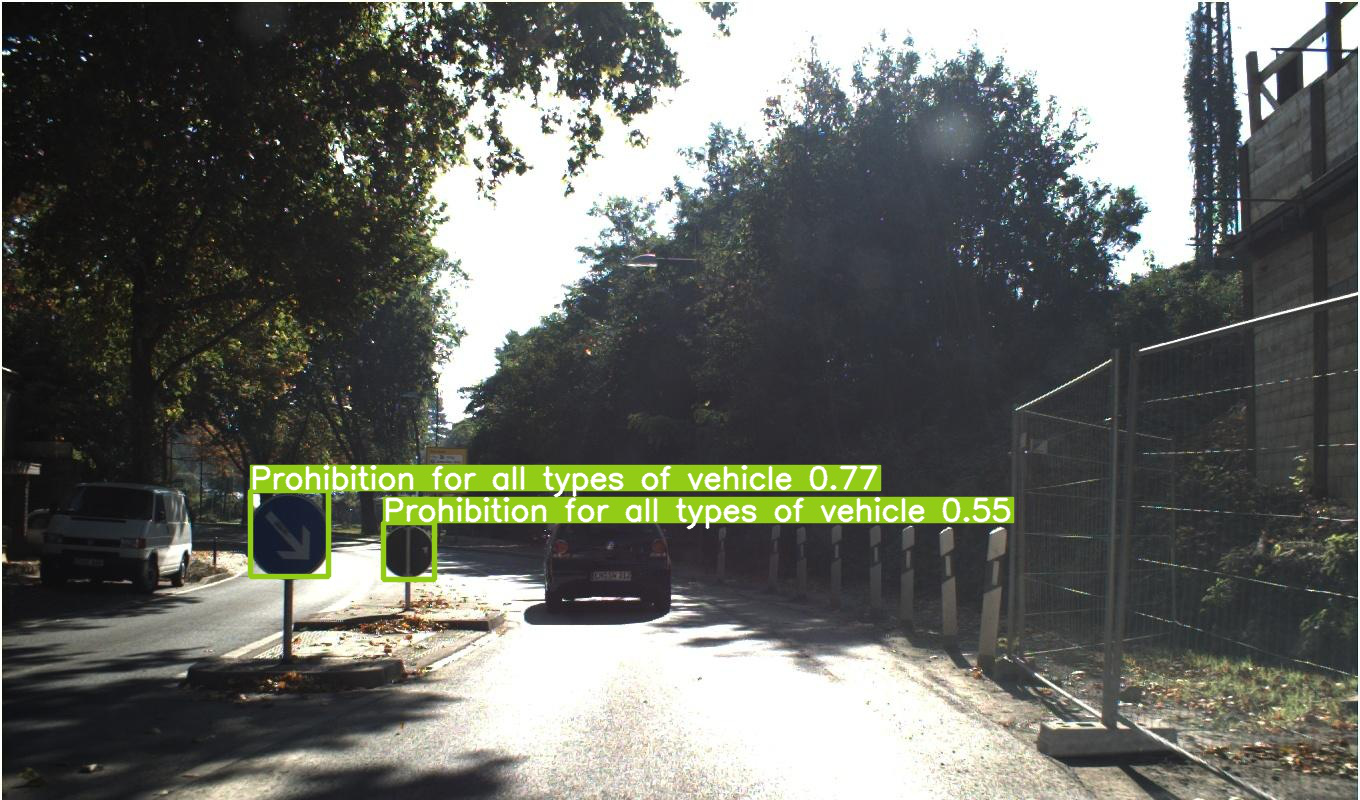

In [ ]:
# Display Inferance
from PIL import Image
print("\n")
img = Image.open('/content/yolov5/runs/detect/exp3/00082_jpg.rf.fbaa096d7bcdd6ff360d8f7d661c0dd1.jpg')
img.show()

Saving The Model :

In [ ]:
from keras.models import Model
from tensorflow.keras.models import load_model

model.save('/content/gdrive/MyDrive/saved models/subscribe.hdf5')

# 4. Visualize

## Comet Logging and Visualization 🌟 NEW

[Comet](https://www.comet.com/site/lp/yolov5-with-comet/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab) is now fully integrated with YOLOv5. Track and visualize model metrics in real time, save your hyperparameters, datasets, and model checkpoints, and visualize your model predictions with [Comet Custom Panels](https://www.comet.com/docs/v2/guides/comet-dashboard/code-panels/about-panels/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab)! Comet makes sure you never lose track of your work and makes it easy to share results and collaborate across teams of all sizes!

Getting started is easy:
```shell
pip install comet_ml  # 1. install
export COMET_API_KEY=<Your API Key>  # 2. paste API key
python train.py --img 640 --epochs 3 --data coco128.yaml --weights yolov5s.pt  # 3. train
```
To learn more about all of the supported Comet features for this integration, check out the [Comet Tutorial](https://github.com/ultralytics/yolov5/tree/master/utils/loggers/comet). If you'd like to learn more about Comet, head over to our [documentation](https://www.comet.com/docs/v2/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab). Get started by trying out the Comet Colab Notebook:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1RG0WOQyxlDlo5Km8GogJpIEJlg_5lyYO?usp=sharing)

<a href="https://bit.ly/yolov5-readme-comet2">
<img alt="Comet Dashboard" src="https://user-images.githubusercontent.com/26833433/202851203-164e94e1-2238-46dd-91f8-de020e9d6b41.png" width="1280"/></a>

## ClearML Logging and Automation 🌟 NEW

[ClearML](https://cutt.ly/yolov5-notebook-clearml) is completely integrated into YOLOv5 to track your experimentation, manage dataset versions and even remotely execute training runs. To enable ClearML (check cells above):

- `pip install clearml`
- run `clearml-init` to connect to a ClearML server (**deploy your own [open-source server](https://github.com/allegroai/clearml-server)**, or use our [free hosted server](https://cutt.ly/yolov5-notebook-clearml))

You'll get all the great expected features from an experiment manager: live updates, model upload, experiment comparison etc. but ClearML also tracks uncommitted changes and installed packages for example. Thanks to that ClearML Tasks (which is what we call experiments) are also reproducible on different machines! With only 1 extra line, we can schedule a YOLOv5 training task on a queue to be executed by any number of ClearML Agents (workers).

You can use ClearML Data to version your dataset and then pass it to YOLOv5 simply using its unique ID. This will help you keep track of your data without adding extra hassle. Explore the [ClearML Tutorial](https://github.com/ultralytics/yolov5/tree/master/utils/loggers/clearml) for details!

<a href="https://cutt.ly/yolov5-notebook-clearml">
<img alt="ClearML Experiment Management UI" src="https://github.com/thepycoder/clearml_screenshots/raw/main/scalars.jpg" width="1280"/></a>

## Local Logging

Training results are automatically logged with [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) loggers to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc.

This directory contains train and val statistics, mosaics, labels, predictions and augmentated mosaics, as well as metrics and charts including precision-recall (PR) curves and confusion matrices. 

<img alt="Local logging results" src="https://user-images.githubusercontent.com/26833433/183222430-e1abd1b7-782c-4cde-b04d-ad52926bf818.jpg" width="1280"/>


# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Notebooks** with free GPU: <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a> <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![YOLOv5 CI](https://github.com/ultralytics/yolov5/actions/workflows/ci-testing.yml/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.


# Traffic Sign Detection from any Video consisting traffic signs

In [ ]:
pip install gTTS

In [ ]:
import numpy as np
import pandas as pd
import cv2
import time
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import pickle
from gtts import gTTS
from keras.models import load_model

import os
#print(os.listdir('../input'))

In [ ]:
labels = pd.read_csv('/content/label_names.csv')
print(labels)

In [ ]:
model = load_model('/content/model-3x3.h5')
with open('/content/mean_image_rgb.pickle', 'rb') as f:
    mean = pickle.load(f, encoding='latin1')
    
print(mean['mean_image_rgb'].shape)

In [ ]:
path_to_weights = '/content/yolov3_ts_train_5000.weights'
path_to_cfg = '/content/yolov3_ts_test.cfg'

network = cv2.dnn.readNetFromDarknet(path_to_cfg, path_to_weights)

# To use with GPU
'''
network.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
network.setPreferableTarget(cv2.dnn.DNN_TARGET_OPENCL_FP16)
'''

In [ ]:
'''
layers_all = network.getLayerNames()
layers_names_output = [layers_all[i[0] - 1] for i in network.getUnconnectedOutLayers()]
'''
layers_all = network.getLayerNames()
#layers_names_output = [layers_all[i[1] - 1] for i in network.getUnconnectedOutLayers()]

layers_names_output = [layers_all[i - 1] for i in network.getUnconnectedOutLayers()]

In [ ]:
# Minimum probability to eliminate weak detections
probability_minimum = 0.6

# Setting threshold to filtering weak bounding boxes by non-maximum suppression
threshold = 0.2

# Generating colours for bounding boxes
# randint(low, high=None, size=None, dtype='l')
colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

# Check point
print(type(colours))  # <class 'numpy.ndarray'>
print(colours.shape)  # (43, 3)
print(colours[0])  # [25  65 200]

In [ ]:
# Reading video from a file by VideoCapture object
video = cv2.VideoCapture('/content/ftgfg.mp4')
# video = cv2.VideoCapture('../input/videofortesting/ts_video_1.mp4')
#video = cv2.VideoCapture('../input/videofortesting/ts_video_6.mp4')

# Writer that will be used to write processed frames
writer = None

# Variables for spatial dimensions of the frames
h, w = None, None

In [ ]:
%matplotlib inline

# Setting default size of plots
plt.rcParams['figure.figsize'] = (3, 3)

# Variable for counting total amount of frames
f = 0

# Variable for counting total processing time
t = 0

# Catching frames in the loop
while True:
    # Capturing frames one-by-one
    ret, frame = video.read()

    # If the frame was not retrieved
    if not ret:
        break
       
    # Getting spatial dimensions of the frame for the first time
    if w is None or h is None:
        # Slicing two elements from tuple
        h, w = frame.shape[:2]

    # Blob from current frame
    blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416), swapRB=True, crop=False)

    # Forward pass with blob through output layers
    network.setInput(blob)
    start = time.time()
    output_from_network = network.forward(layers_names_output)
    end = time.time()

    # Increasing counters
    f += 1
    t += end - start

    # Spent time for current frame
    print('Frame number {0} took {1:.5f} seconds'.format(f, end - start))

    # Lists for detected bounding boxes, confidences and class's number
    bounding_boxes = []
    confidences = []
    class_numbers = []

    # Going through all output layers after feed forward pass
    for result in output_from_network:
        # Going through all detections from current output layer
        for detected_objects in result:
            # Getting 80 classes' probabilities for current detected object
            scores = detected_objects[5:]
            # Getting index of the class with the maximum value of probability
            class_current = np.argmax(scores)
            # Getting value of probability for defined class
            confidence_current = scores[class_current]

            # Eliminating weak predictions by minimum probability
            if confidence_current > probability_minimum:
                # Scaling bounding box coordinates to the initial frame size
                box_current = detected_objects[0:4] * np.array([w, h, w, h])

                # Getting top left corner coordinates
                x_center, y_center, box_width, box_height = box_current
                x_min = int(x_center - (box_width / 2))
                y_min = int(y_center - (box_height / 2))

                # Adding results into prepared lists
                bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
                confidences.append(float(confidence_current))
                class_numbers.append(class_current)
                

    # Implementing non-maximum suppression of given bounding boxes
    results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)

    # Checking if there is any detected object been left
    if len(results) > 0:
        # Going through indexes of results
        for i in results.flatten():
            # Bounding box coordinates, its width and height
            x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
            box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]
            
            
            # Cut fragment with Traffic Sign
            c_ts = frame[y_min:y_min+int(box_height), x_min:x_min+int(box_width), :]
            # print(c_ts.shape)
            
            if c_ts.shape[:1] == (0,) or c_ts.shape[1:2] == (0,):
                pass
            else:
                # Getting preprocessed blob with Traffic Sign of needed shape
                blob_ts = cv2.dnn.blobFromImage(c_ts, 1 / 255.0, size=(32, 32), swapRB=True, crop=False)
                blob_ts[0] = blob_ts[0, :, :, :] - mean['mean_image_rgb']
                blob_ts = blob_ts.transpose(0, 2, 3, 1)
                # plt.imshow(blob_ts[0, :, :, :])
                # plt.show()

                # Feeding to the Keras CNN model to get predicted label among 43 classes
                scores = model.predict(blob_ts)

                # Scores is given for image with 43 numbers of predictions for each class
                # Getting only one class with maximum value
                prediction = np.argmax(scores)
                # print(labels['SignName'][prediction])


                # Colour for current bounding box
                colour_box_current = colours[class_numbers[i]].tolist()

                # Drawing bounding box on the original current frame
                cv2.rectangle(frame, (x_min, y_min),
                              (x_min + box_width, y_min + box_height),
                              colour_box_current, 2)

                # Preparing text with label and confidence for current bounding box
                text_box_current = '{}: {:.4f}'.format(labels['SignName'][prediction],
                                                       confidences[i])

                # Putting text with label and confidence on the original image
                cv2.putText(frame, text_box_current, (x_min, y_min - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, colour_box_current, 2)


    # Initializing writer only once
    if writer is None:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')

        # Writing current processed frame into the video file
        writer = cv2.VideoWriter('result.mp4', fourcc, 25,
                                 (frame.shape[1], frame.shape[0]), True)

    # Write processed current frame to the file
    writer.write(frame)


# Releasing video reader and writer
video.release()
writer.release()

In [ ]:
# Saving locally without committing
from IPython.display import FileLink

FileLink('result.mp4')

#Appendix

Additional content below:

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)  # yolov5n - yolov5x6 or custom
im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.